In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [12]:
DATA_PATH = Path("joined_data/joined_interpol_data.csv")
df = pd.read_csv(DATA_PATH)

In [13]:
df.head()


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Illuminance (lx),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),...,Direction (°),Horizontal Accuracy (m),Vertical Accuracy (m),Magnetic field x (µT),Magnetic field y (µT),Magnetic field z (µT),Pressure (hPa),Distance (cm),Common time (s),Activity
0,-1.889025,6.510732,7.223082,-0.087699,-0.106835,0.023549,126.14875,0.064004,0.030721,0.083742,...,NaN,13.976,2.046588,19.8372,-74.188202,80.715195,1005.813538,5.0,0.000000,rest
1,-1.889025,6.510732,7.223082,-0.087699,-0.106835,0.023549,126.14875,0.064004,0.030721,0.083742,...,NaN,13.976,2.046588,19.8372,-74.188202,80.715195,1005.813538,5.0,0.002486,rest
2,-1.889025,6.510732,7.223082,-0.087699,-0.106835,0.023549,126.14875,0.064004,0.030721,0.083742,...,NaN,13.976,2.046588,19.8372,-74.188202,80.715195,1005.813538,5.0,0.004973,rest
3,-1.889025,6.510732,7.223082,-0.087699,-0.106835,0.023549,126.14875,0.064004,0.030721,0.083742,...,NaN,13.976,2.046588,19.8372,-74.188202,80.715195,1005.813538,5.0,0.007459,rest
4,-1.898602,6.535572,7.266178,-0.087699,-0.106835,0.023549,126.14875,0.064004,0.030721,0.083742,...,NaN,13.976,2.046588,19.8372,-74.188202,80.715195,1005.813538,5.0,0.009945,rest


In [14]:
numeric_cols = df.select_dtypes(float).columns
print("Numeric columns:", numeric_cols.to_list())

Numeric columns: ['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)', 'Illuminance (lx)', 'Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Latitude (°)', 'Longitude (°)', 'Height (m)', 'Velocity (m/s)', 'Direction (°)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (m)', 'Magnetic field x (µT)', 'Magnetic field y (µT)', 'Magnetic field z (µT)', 'Pressure (hPa)', 'Distance (cm)', 'Common time (s)']


### Missing values 


In [35]:
na_counts = df.isna().sum()
na_pct    = (na_counts / len(df)) * 100
na_report = (pd.DataFrame({"NaN count": na_counts, "NaN %": na_pct.round(2)}).sort_values("NaN count", ascending=False))
display(na_report)

# highlight columns with any missing data
cols_with_na = na_report.query("`NaN count` > 0").index.tolist()
print("\nColumns that contain at least one NaN:")
print(cols_with_na)

,NaN count,NaN %
Velocity (m/s),416297,100.00
Direction (°),416297,100.00
Height (m),16103,3.87
acc_roll_sig,499,0.12
acc_roll_mu,499,0.12
Magnetic field x (µT),0,0.00
mag_mag,0,0.00
linacc_mag,0,0.00
gyro_mag,0,0.00
acc_mag,0,0.00



Columns that contain at least one NaN:
['Velocity (m/s)', 'Direction (°)', 'Height (m)', 'acc_roll_sig', 'acc_roll_mu']


### Distributions 

In [15]:
plt.rcParams["figure.figsize"] = (10, 4)      
plt.rcParams["axes.grid"] = True  

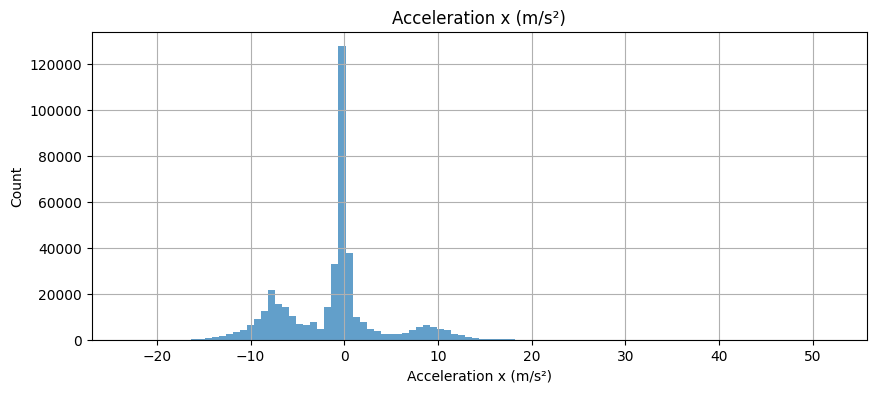

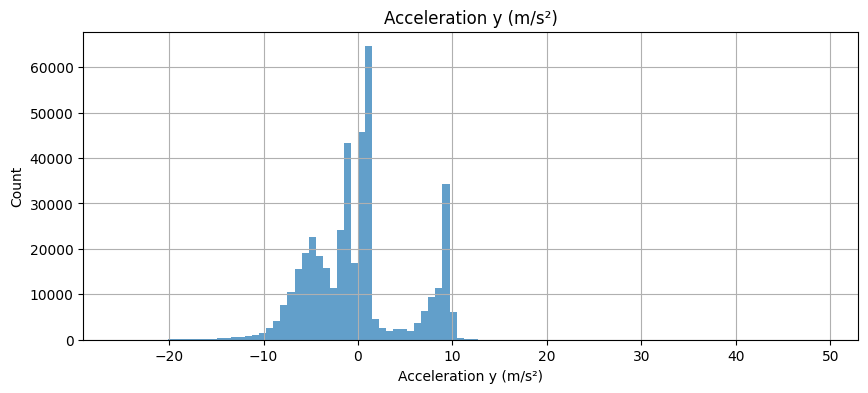

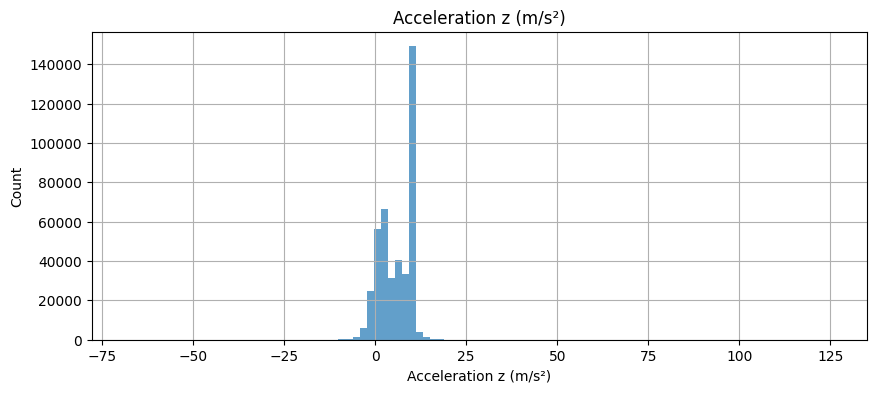

In [16]:
# Acceleration histograms (x, y, z)
acc_cols = [
    "Acceleration x (m/s^2)",
    "Acceleration y (m/s^2)",
    "Acceleration z (m/s^2)",]
for col in acc_cols:
    df[col].hist(bins=100, alpha=0.7)
    plt.title(col.replace("^2", "²")) 
    plt.xlabel(col.replace("^2", "²"))
    plt.ylabel("Count")
    plt.show()

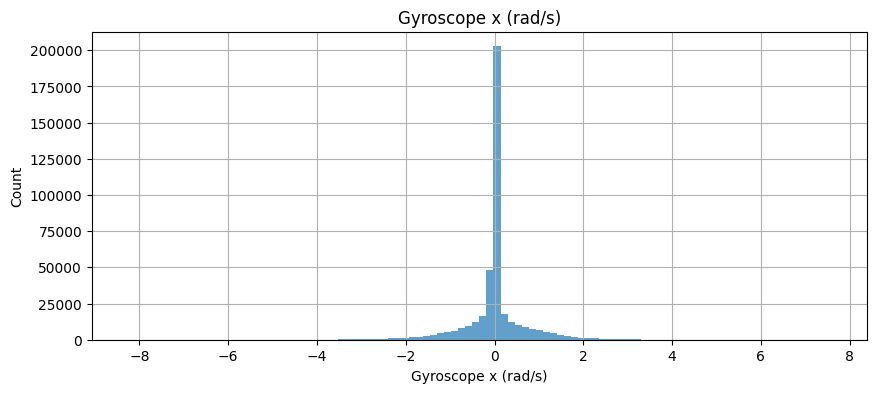

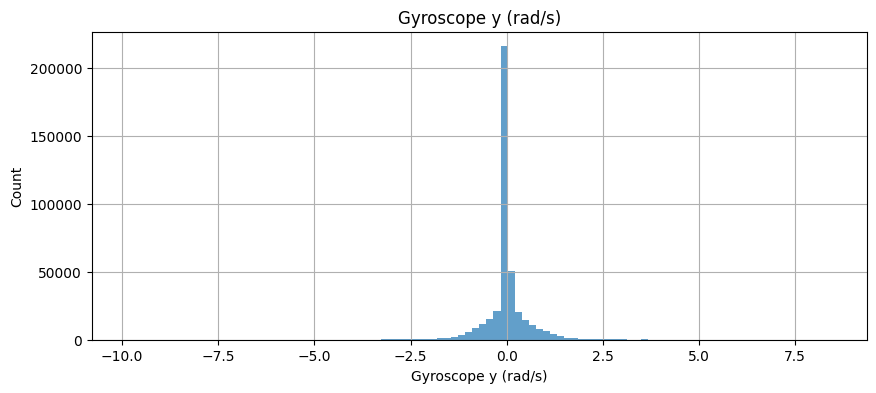

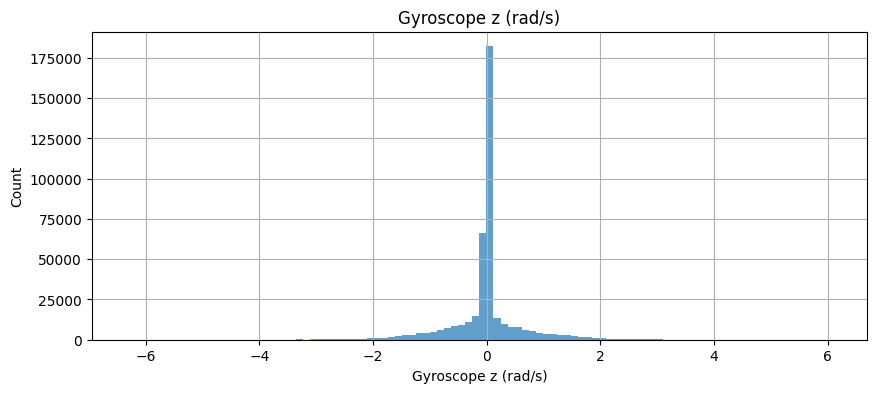

In [17]:
# Gyroscope histograms (x, y, z)
gyro_cols = [
    "Gyroscope x (rad/s)",
    "Gyroscope y (rad/s)",
    "Gyroscope z (rad/s)",]
for col in gyro_cols:
    df[col].hist(bins=100, alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

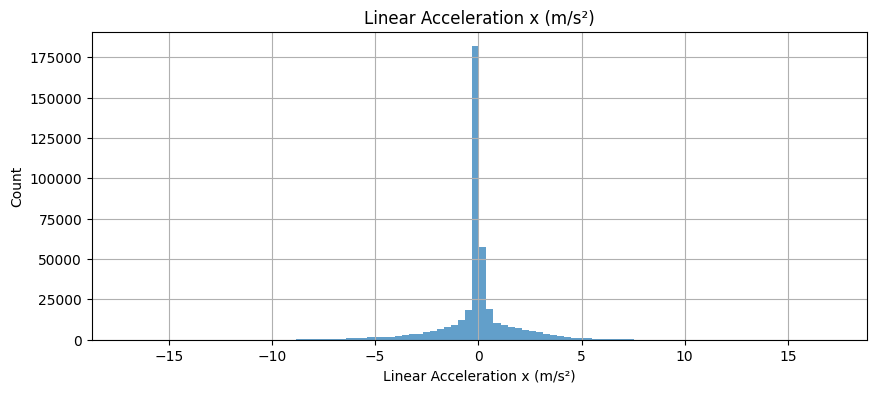

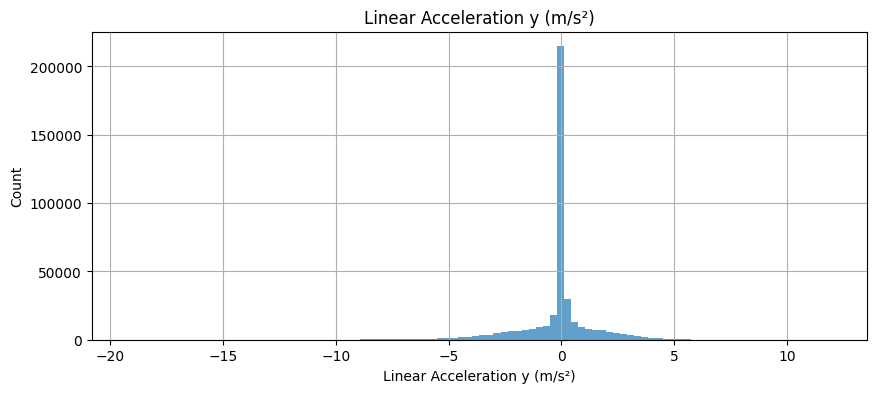

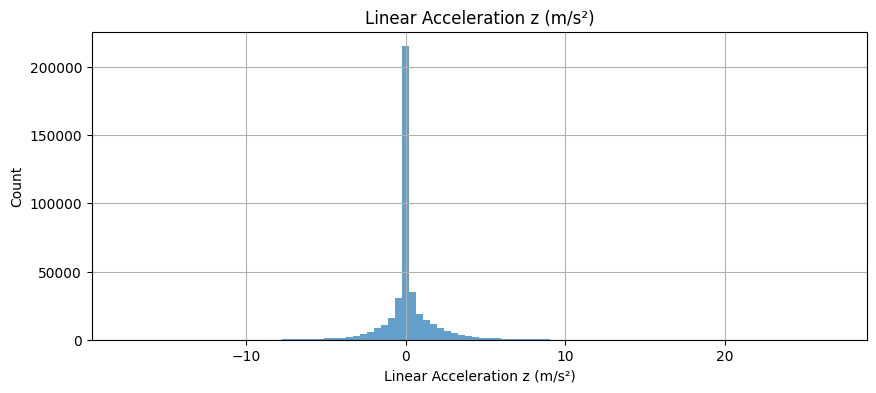

In [18]:
# Linear-acceleration histograms (x, y, z)
linacc_cols = [
    "Linear Acceleration x (m/s^2)",
    "Linear Acceleration y (m/s^2)",
    "Linear Acceleration z (m/s^2)",
]
for col in linacc_cols:
    df[col].hist(bins=100, alpha=0.7)
    plt.title(col.replace("^2", "²")) 
    plt.xlabel(col.replace("^2", "²"))
    plt.ylabel("Count")
    plt.show()

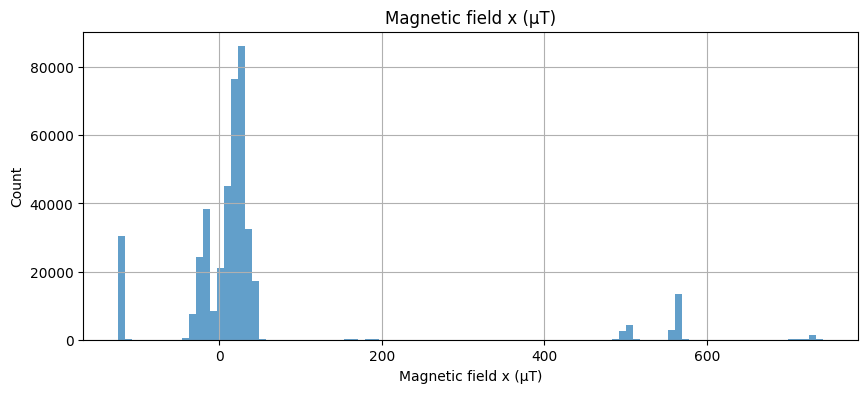

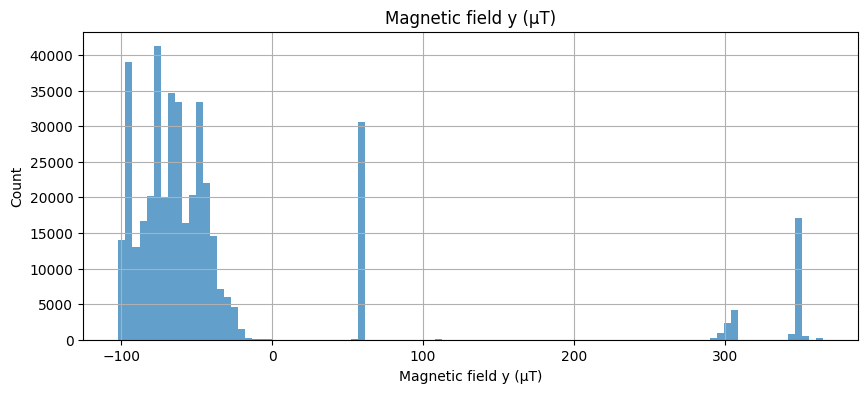

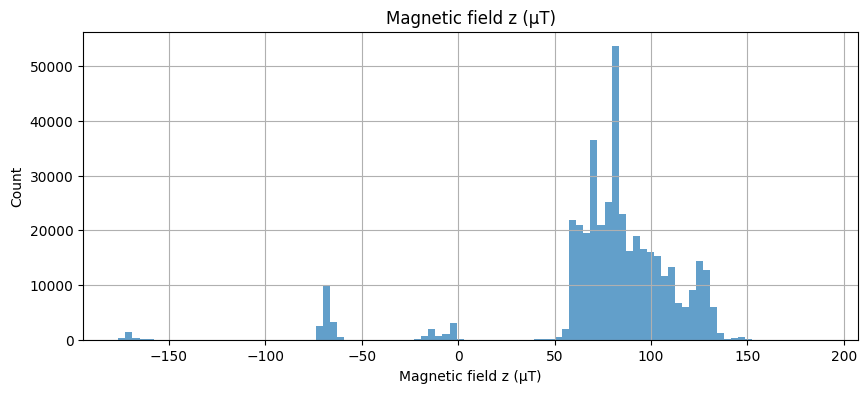

In [19]:
# Magnetic field histograms (x,y,z)
mag_cols = [
    "Magnetic field x (µT)",
    "Magnetic field y (µT)",
    "Magnetic field z (µT)",
]

for col in mag_cols:
    df[col].hist(bins=100, alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

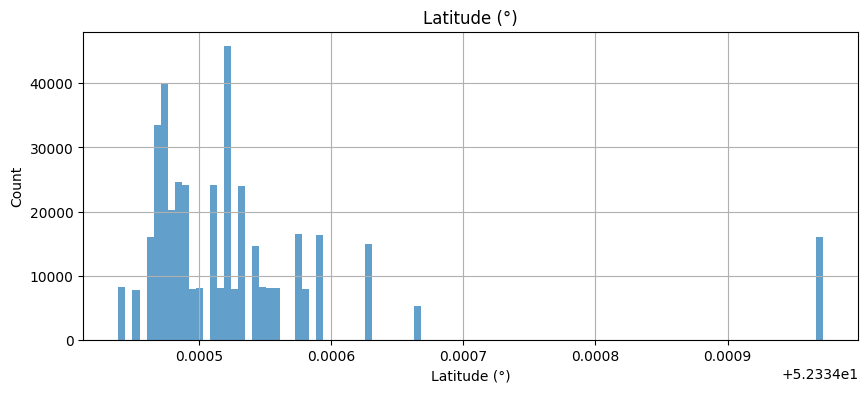

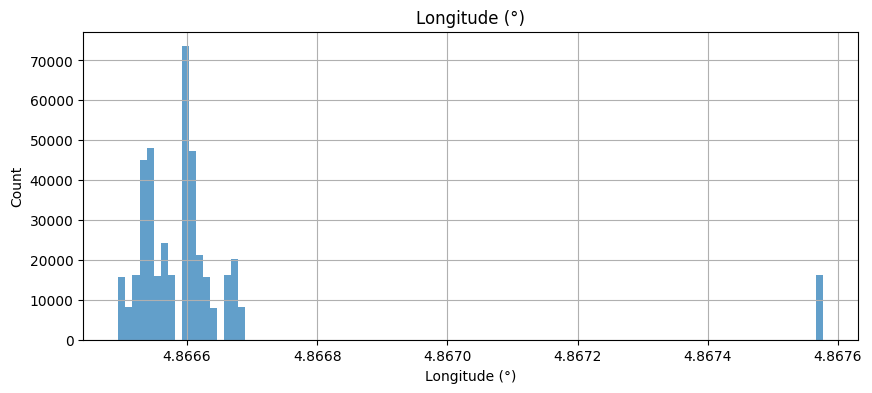

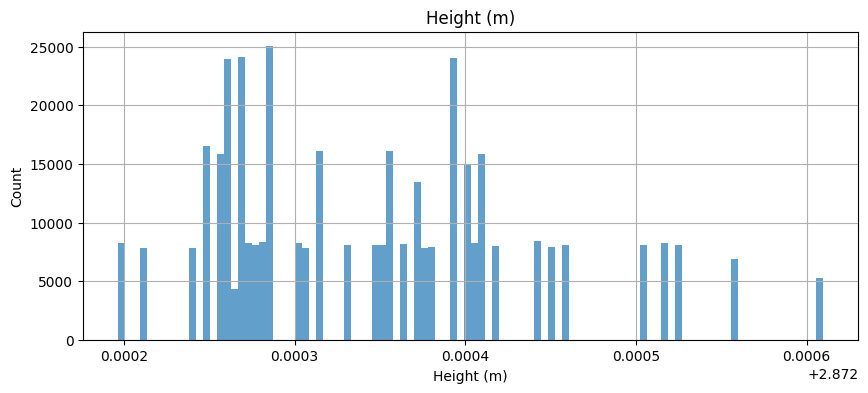

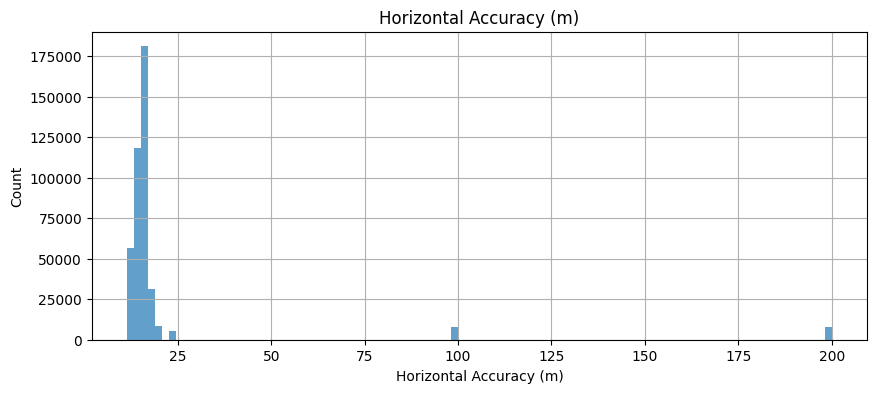

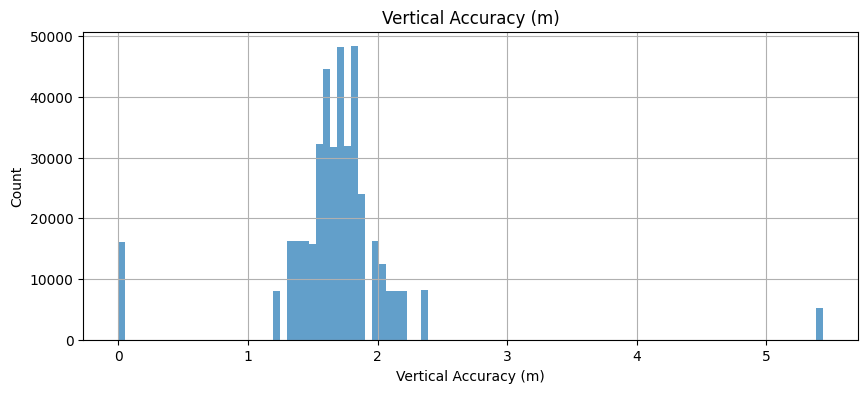

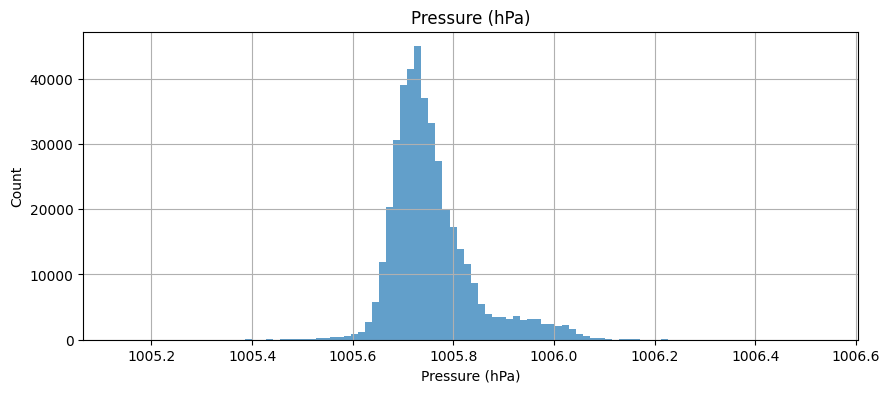

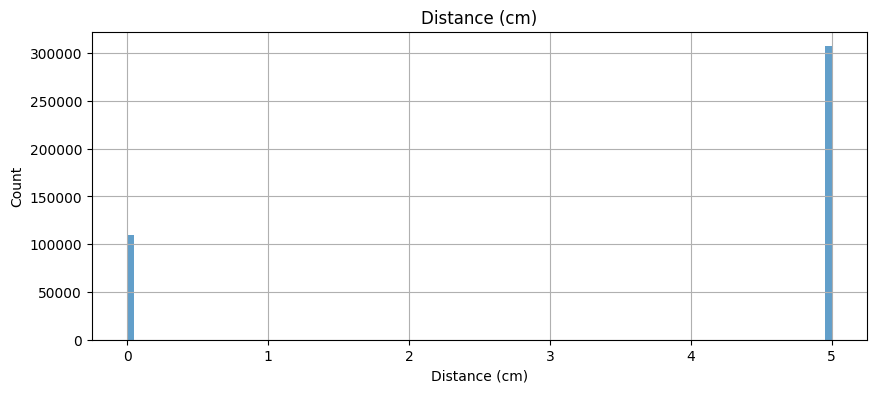

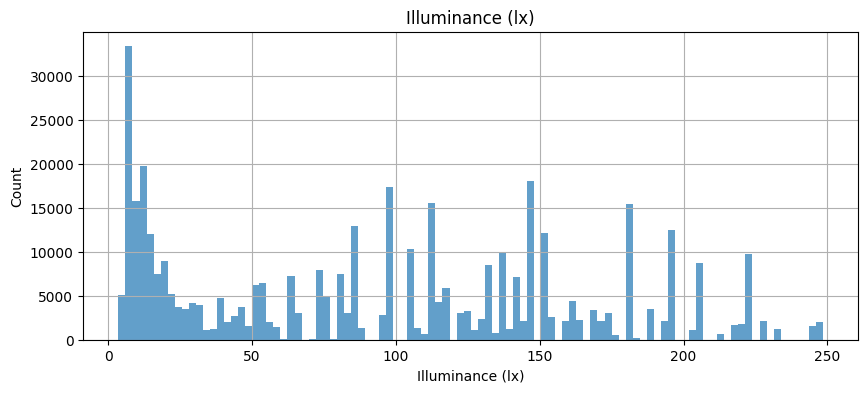

In [24]:
cols = [
    "Latitude (°)",
    "Longitude (°)",
    "Height (m)",
    "Horizontal Accuracy (m)",
    "Vertical Accuracy (m)",
    "Pressure (hPa)",
    "Distance (cm)",
    "Illuminance (lx)",
]
for col in cols:
    df[col].hist(bins=100, alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

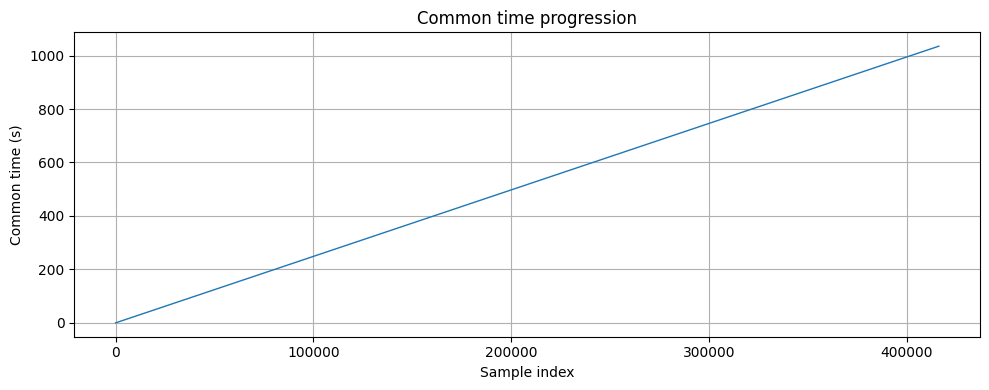

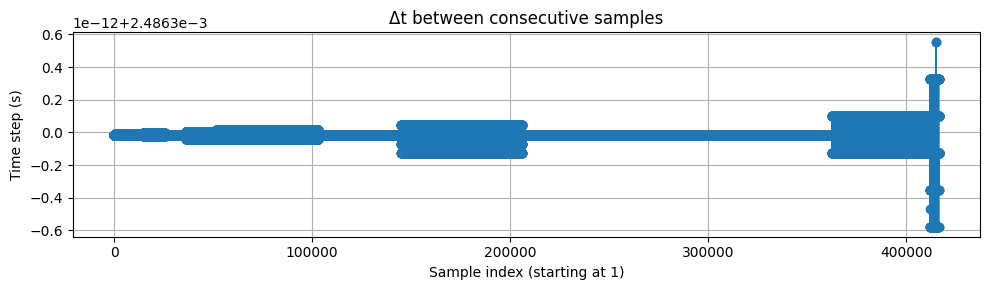

In [22]:
## common time

# looking at sampling time
x = np.arange(len(df))
y = df["Common time (s)"]

plt.figure(figsize=(10, 4))
plt.plot(x, y, linewidth=1)

plt.title("Common time progression")
plt.xlabel("Sample index")
plt.ylabel("Common time (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


# looking at irregularities 
dt = np.diff(df["Common time (s)"])
plt.figure(figsize=(10, 3))
plt.plot(dt, marker="o", linewidth=0.8)
plt.title("Δt between consecutive samples")
plt.xlabel("Sample index (starting at 1)")
plt.ylabel("Time step (s)")
plt.grid(True)
plt.tight_layout()
plt.show()

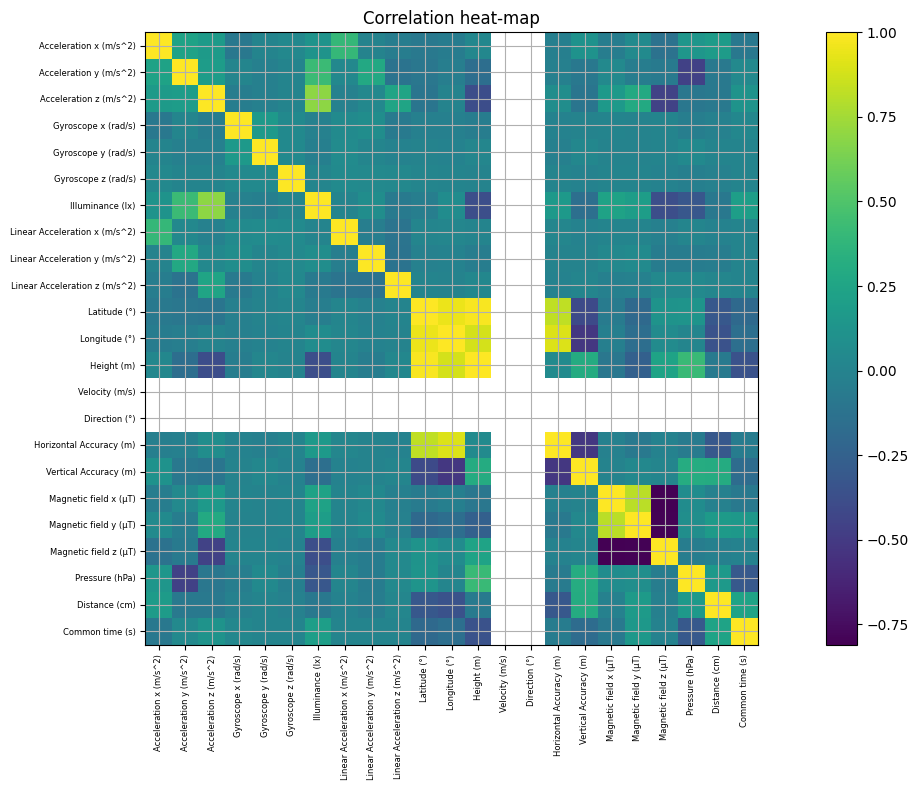

In [21]:
## Correlation heat-map

plt.rcParams["figure.figsize"] = (10, 4)      
plt.rcParams["axes.grid"] = True   

corr = df[numeric_cols].corr()

plt.imshow(corr, interpolation='none')
plt.colorbar()
plt.title("Correlation heat-map")
plt.xticks(range(len(numeric_cols)), numeric_cols,
           rotation=90, fontsize=6)
plt.yticks(range(len(numeric_cols)), numeric_cols, fontsize=6)
plt.tight_layout()
plt.show()

In [26]:
# computing magnitude (Euclidean norm) of 3-D vector for acc, gyro & magn

sensor_axes = {
    "acc":  ['Acceleration x (m/s^2)',
             'Acceleration y (m/s^2)',
             'Acceleration z (m/s^2)'],
    "gyro": ['Gyroscope x (rad/s)',
             'Gyroscope y (rad/s)',
             'Gyroscope z (rad/s)'],
    "linacc": ['Linear Acceleration x (m/s^2)',
               'Linear Acceleration y (m/s^2)',
               'Linear Acceleration z (m/s^2)'],
    "mag":  ['Magnetic field x (µT)',
             'Magnetic field y (µT)',
             'Magnetic field z (µT)'],
}

for name, axes in sensor_axes.items():
    if all(col in df.columns for col in axes):
        df[f"{name}_mag"] = np.linalg.norm(df[axes].values, axis=1)
    else:
        missing = [c for c in axes if c not in df.columns]
        print(f"⚠️  Skipped {name}_mag — missing columns: {missing}")

print("now have:", [c for c in df.columns if c.endswith('_mag')])

now have: ['acc_mag', 'gyro_mag', 'linacc_mag', 'mag_mag']


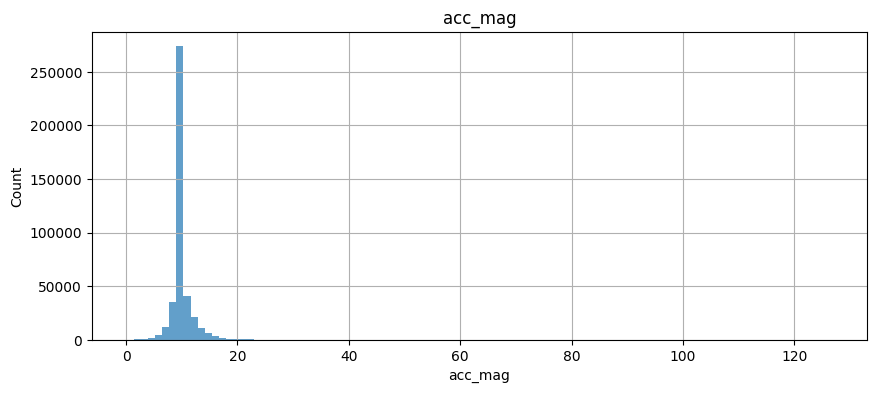

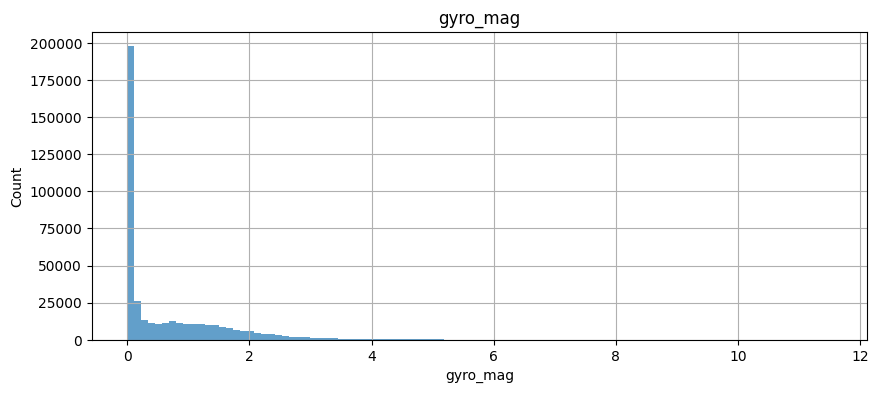

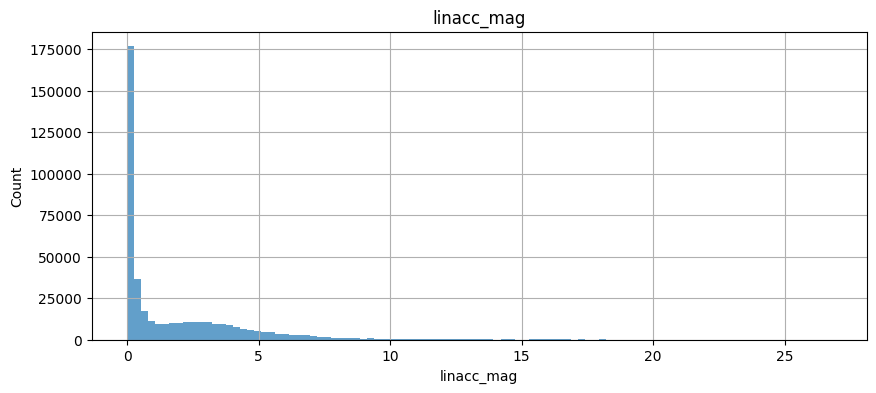

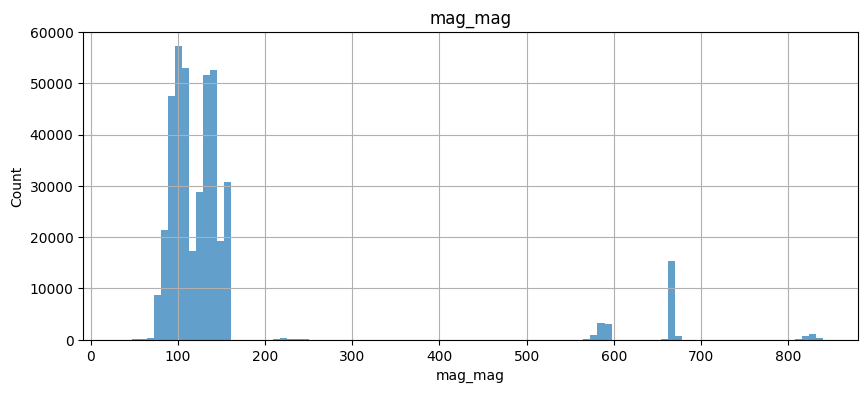

In [27]:
for col in ["acc_mag", "gyro_mag", "linacc_mag", "mag_mag"]:
    df[col].hist(bins=100, alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

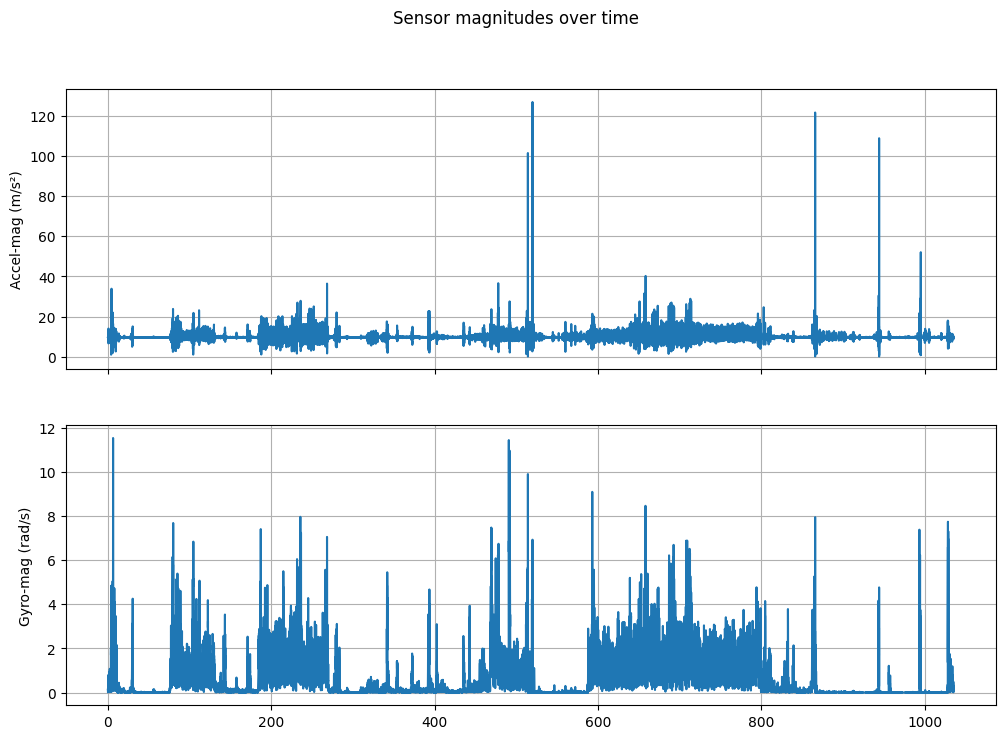

In [31]:
# Time-series overview
t = df['Common time (s)']            

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

axs[0].plot(t, df['acc_mag'])
axs[0].set_ylabel("Accel-mag (m/s²)")

axs[1].plot(t, df['gyro_mag'])
axs[1].set_ylabel("Gyro-mag (rad/s)")

plt.suptitle("Sensor magnitudes over time")
plt.show()

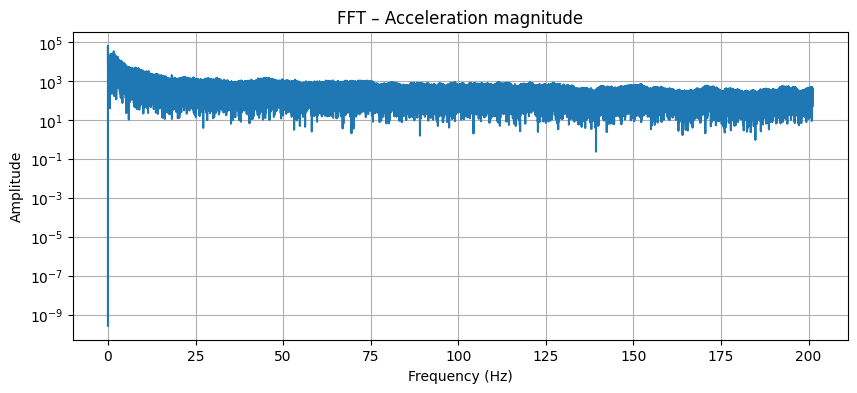

In [32]:
# Frequency-domain view of acceleration magnitude
from scipy.fft import rfft, rfftfreq

fs = 1 / np.median(np.diff(t))           # sampling frequency (Hz)
N  = len(t)

yf = np.abs(rfft(df['acc_mag'] - df['acc_mag'].mean()))
xf = rfftfreq(N, 1/fs)

plt.semilogy(xf, yf)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT – Acceleration magnitude")
plt.show()

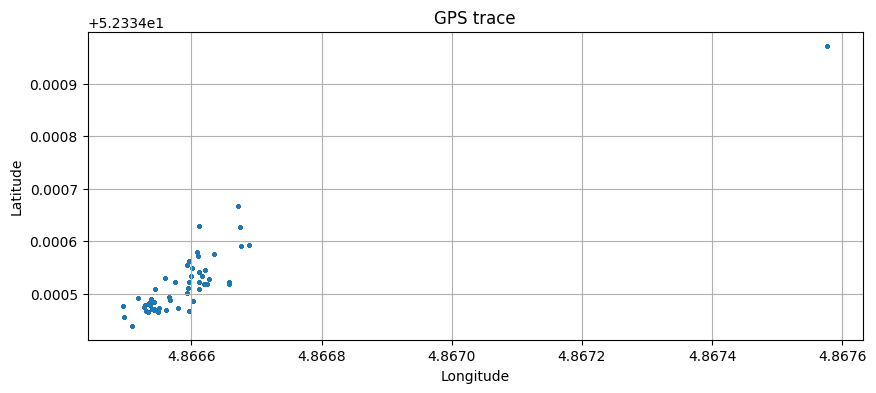

In [33]:
# Geospatial scatter
if df['Latitude (°)'].nunique() > 1:
    plt.scatter(df['Longitude (°)'], df['Latitude (°)'], s=2, alpha=0.5)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("GPS trace")
    plt.show()

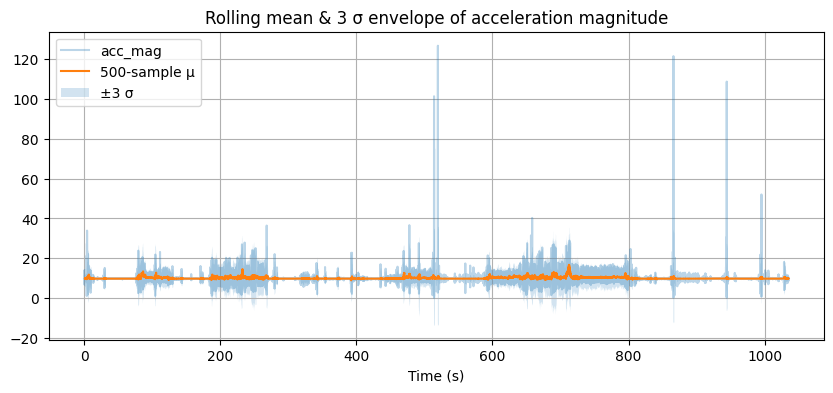

In [34]:
# Rolling statistics & anomaly bands
win = 500                          
df['acc_roll_mu']  = df['acc_mag'].rolling(win).mean()
df['acc_roll_sig'] = df['acc_mag'].rolling(win).std()

fig, ax = plt.subplots()
ax.plot(t, df['acc_mag'], label='acc_mag', alpha=0.3)
ax.plot(t, df['acc_roll_mu'], label=f'{win}-sample μ')
ax.fill_between(
    t,
    df['acc_roll_mu'] - 3*df['acc_roll_sig'],
    df['acc_roll_mu'] + 3*df['acc_roll_sig'],
    alpha=0.2, label='±3 σ'
)
ax.legend()
ax.set_xlabel("Time (s)")
ax.set_title("Rolling mean & 3 σ envelope of acceleration magnitude")
plt.show()